<a href="https://colab.research.google.com/github/amitdamri/FastAI-Repo/blob/main/Neural_Network_Pytorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple

In [2]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.1 MB/s eta 0:00:00


In [3]:
import torch
import numpy as np
import fastbook
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [119]:
def f_func(x, params):
  a, b, c = params
  pred = a * (x ** 2) + (b*x) + c
  return pred

In [127]:
def init_params(v):
  p = torch.randn(v).requires_grad_()
  return p

In [98]:
def mse(target, pred):
  return ((pred - target) ** 2).mean()

In [106]:
def show_preds(x, y, preds, ax = None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(x, y)
  ax.scatter(x, to_np(preds), c='red')
  ax.set_ylim(-50, 100)

In [90]:
def demo_function(x):
  return 0.75 * (x - 9.5) ** 2  + 1

In [91]:
def noise_function(x):
  return torch.randn(len(x)) * 3

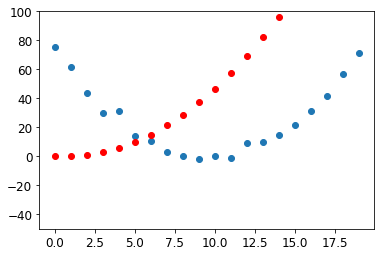

In [175]:
params = init_params(3)
x = torch.arange(20).float()
y = demo_function(x) + noise_function(x)
preds = f_func(x, params)
show_preds(x, y, preds)

In [163]:
loss = mse(y ,preds)
loss

tensor(2025.4893, grad_fn=<MeanBackward0>)

In [164]:
# sanity check
s = 0
for i, t in enumerate(x):
  pred = params[0] * (t ** 2) + (params[1] * t) + params[2]
  actual = y[i]
  s += (actual - pred) ** 2
loss = s / len(time)
print(loss)

tensor(2025.4893, grad_fn=<DivBackward0>)


In [165]:
loss.backward()

In [166]:
lr = 1e-5
params.data -= params.grad * lr
params.grad = None

In [167]:
preds = f_func(x, params)
mse(preds, y)

tensor(949.0934, grad_fn=<MeanBackward0>)

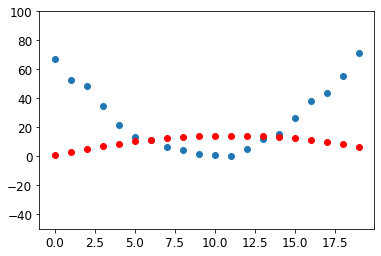

In [168]:
show_preds(x, y, preds)

In [171]:
def apply_step(params, lr, prn=True):
  preds = f_func(x, params)
  loss = mse(preds, y)
  loss.backward()
  params.data -= params.grad * lr
  params.grad = None
  if prn: print(loss.item())
  return preds

In [172]:
for i in range(10) : apply_step(params, lr)

949.0934448242188
745.3898315429688
706.8262939453125
699.5122680664062
698.111572265625
697.8297729492188
697.7598266601562
697.7301025390625
697.7077026367188
697.6868896484375


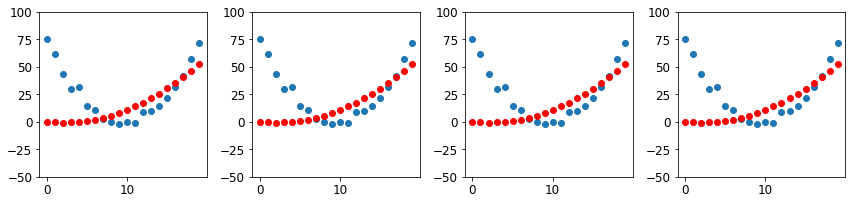

In [178]:
_, axs = plt.subplots(1, 4, figsize= (12,3))
for ax in axs:
  show_preds(x, y, apply_step(params, lr, prn= False), ax)
  plt.tight_layout()

# MNIST

In [4]:
path = untar_data(URLs.MNIST)
(path/'training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/0')]

In [4]:
img = Image.open((path/'training/2').ls()[0])
df = pd.DataFrame(tensor(img)[4:20, 5:20])
df.style.set_properties(**{'font_size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,102,202,27,0,0,0,10,49,136,254,202,29,0,0
1,0,0,0,0,0,0,0,0,0,7,56,175,224,48,0
2,0,0,0,0,0,0,0,0,0,0,0,0,198,216,25
3,0,0,0,0,0,0,0,0,0,0,0,0,24,205,150
4,0,0,0,0,0,0,0,0,0,0,0,0,0,26,247
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169
9,0,0,0,0,0,0,0,0,0,0,0,0,0,10,254


In [3]:
from torchvision import transforms

twos_folder = (path/'training'/'2').ls()
twos = [transforms.ToTensor()(Image.open(o)) for o in twos_folder]

In [6]:
twoss = [tensor(Image.open(o)) for o in twos_folder]

In [7]:
(torch.stack(twos).squeeze()[0] == torch.stack(twoss)[0] /255.0).sum()

tensor(784)

In [8]:
(path/'training').ls()[0].name

'9'

In [4]:
def get_x_data(training = True):
  inner_f = 'testing' if not training else 'training'
  numbers = []
  
  for p in (path/f'{inner_f}').ls():
    i = [transforms.ToTensor()(Image.open(o)) for o in p.ls()]
    stacked_i = torch.stack(i).squeeze()
    numbers.append(stacked_i)
    
  return torch.cat(numbers).view(-1, 28 * 28)

train_x = get_x_data()

In [5]:
train_y = torch.Tensor([int(p.name) for p in (path/'training').ls() for i in p.ls()])
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [11]:
data = list(zip(train_x, train_y))

In [12]:
x,y = data[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([]))

In [6]:
valid_x = get_x_data(training=False)
valid_y = torch.Tensor([int(p.name) for p in (path/'testing').ls() for i in p.ls()])
print(valid_x.shape, valid_y.shape)
validation_data = list(zip(valid_x, valid_y))

torch.Size([10000, 784]) torch.Size([10000])


In [7]:
def init_params(size : Int, std = 0.1) -> torch.Tensor: 
  return (torch.randn(size)).requires_grad_()

In [15]:
weights = init_params((28 * 28, 10))
bias = init_params(10)
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [16]:
train_x[0].shape

torch.Size([784])

In [17]:
(train_x[0] * weights.T).sum(axis = 1) + bias

tensor([-10.3446,   0.9014,   2.1841,  -8.9412,  -5.9019,   6.6065,  -2.3350,   5.8430,  10.7031,   5.9457], grad_fn=<AddBackward0>)

In [18]:
train_x[0] @ weights + bias

tensor([-10.3446,   0.9014,   2.1841,  -8.9413,  -5.9019,   6.6065,  -2.3350,   5.8430,  10.7031,   5.9457], grad_fn=<AddBackward0>)

In [8]:
def linear(x, params):
  w,b = params
  pred = x @ w + b
  return pred

preds = linear(train_x, (weights, bias))

NameError: ignored

In [ ]:
# different change in weights does not change the accuracy, hence accuracy is not a good measure for learning
with torch.no_grad(): weights[0] *= 0.0001

(torch.argmax(preds, axis = 1) == train_y).float().mean().item()

In [9]:
def mnist_loss(predictions, targets):
  loss = - predictions[range(len(targets)), targets].log().mean()
  return loss
  # loss = torch.nn.CrossEntropyLoss()
  # return loss(predictions, targets)

# mnist_loss(preds, train_y)

In [10]:
# sanity check
t = torch.Tensor([[0.4,0.45,0.15]]).requires_grad_()
tr = torch.LongTensor([0])
mnist_loss(t, tr)

tensor(0.9163, grad_fn=<NegBackward0>)

In [11]:
def softmax(x):
  activation = torch.exp(x) / torch.exp(x).sum(axis = 1).unsqueeze(1)
  return activation

In [12]:
# unit test for softmax
test = torch.Tensor([[1,2,3,4,5]])
print(softmax(test))
print(softmax(test).sum())

tensor([[0.0117, 0.0317, 0.0861, 0.2341, 0.6364]])
tensor(1.)


In [13]:
def accuracy(preds, y):
  return (torch.argmax(preds, axis = 1) == y).float().mean()

In [14]:
def update_weights(params, lr):
  for p in params:
    p.data -= lr * p.grad
    p.grad.zero_()
  return params

In [15]:
def train_cycle(x, y, params, lr = 0.1, epochs = 10):
  x_train, x_val = x
  y_train, y_val = y

  history = []

  for i in range(epochs):
    preds = linear(x_train, params)
    activations = softmax(preds)
    target = y_train.clone().type(torch.LongTensor)
    loss = mnist_loss(activations, target)
    acc = accuracy(activations, target)

    val_pred = linear(x_val, params)
    activations_val = softmax(val_pred)
    val_target = y_val.clone().squeeze().type(torch.LongTensor)
    val_acc = accuracy(activations_val, val_target)
    
    
    history.append((loss, acc, val_acc))
    loss.backward()
    
    print(f"Epoch #{i} : Loss {loss:.2f}, Train Acc: {acc:.2f}, Val Acc: {val_acc:.2f}, bias.grad_sum: {bias.grad.sum()}, weights.grad_sum: {weights.grad.sum()}")
    update_weights(params, lr)

In [ ]:
weights = init_params((28 * 28, 10))
bias = init_params(10)
train_cycle((train_x, valid_x), (train_y, valid_y), (weights, bias), epochs = 300)

In [17]:
(torch.argmax(linear(train_x, (weights, bias)), dim = 1) == train_y.type(torch.LongTensor)).float().mean()

tensor(0.3201)

In [18]:
img = transforms.ToPILImage()(valid_x[1].view(28, 28))
img

In [19]:
torch.argmax(linear(valid_x[1].unsqueeze(1).T, (weights, bias)), dim = 1).item()

4

# MNIST with Minibatches

In [20]:
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)

In [21]:
coll = range(15)
dl = torch.utils.data.DataLoader(coll, batch_size = 5, shuffle = True)
list(dl)

[tensor([ 9,  1,  4, 12, 10]),
 tensor([7, 2, 6, 3, 0]),
 tensor([ 5, 11, 13, 14,  8])]

In [22]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [23]:
dl = torch.utils.data.DataLoader(ds, batch_size = 8, shuffle =False)
list(dl)

[[tensor([0, 1, 2, 3, 4, 5, 6, 7]), ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h')],
 [tensor([ 8,  9, 10, 11, 12, 13, 14, 15]),
  ('i', 'j', 'k', 'l', 'm', 'n', 'o', 'p')],
 [tensor([16, 17, 18, 19, 20, 21, 22, 23]),
  ('q', 'r', 's', 't', 'u', 'v', 'w', 'x')],
 [tensor([24, 25]), ('y', 'z')]]

In [24]:
train_data = list(zip(train_x, train_y.unsqueeze(1).type(torch.LongTensor)))
val_data = list(zip(valid_x, valid_y.unsqueeze(1).type(torch.LongTensor)))

In [25]:
train_data[0][0].shape, train_data[0][1].shape

(torch.Size([784]), torch.Size([1]))

In [26]:
print(train_data[0][1])
img = transforms.ToPILImage()(train_data[0][0].view(28,28))
img

tensor([9])


In [27]:
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
weights = init_params((28*28, 10))
bias = init_params(10)
dl = DataLoader(train_data, batch_size = 256, shuffle = True)

In [28]:
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [29]:
valid_dl = DataLoader(val_data, batch_size = 256)

In [30]:
batch = train_x[:4]
print(batch.shape)
preds = linear(batch, (weights, bias))
print(preds)
loss = mnist_loss(softmax(preds), train_y[:4].type(torch.LongTensor))
print(loss)
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad.shape, bias.grad.mean()

torch.Size([4, 784])
tensor([[  6.1894,   1.4975, -14.6353,   0.8296,   0.6887,  -7.0985, -11.7153,  -7.8400, -15.2752,  16.4157],
        [-16.3663,   2.0219,  -1.8764, -11.3474,  24.7934,   9.8469, -25.4581,  -4.2448, -16.0344,   7.3866],
        [ -0.6646,  10.7198,  -1.5649,  -3.8302,   0.1207,   1.3874,  -2.2511, -15.4515,  -8.0743,  13.4194],
        [  4.7772,   8.3710,  -8.5434,   9.6527,   4.2589,  -6.1182,  -6.5543,   0.7095, -15.1169,  -7.0602]], grad_fn=<AddBackward0>)
tensor(8.6098, grad_fn=<NegBackward0>)


(torch.Size([784, 10]),
 tensor(1.2164e-10),
 torch.Size([10]),
 tensor(-3.8972e-09))

In [31]:
def calc_grad(xb, yb, model):
  preds = model(xb, (weights, bias))
  loss = mnist_loss(softmax(preds), yb.type(torch.LongTensor))
  loss.backward()

calc_grad(train_x[:4], train_y[:4], linear)

In [32]:
weights.grad.mean(), bias.grad.mean()

(tensor(2.4328e-10), tensor(-7.7944e-09))

In [33]:
for i in range(10):
  acc = []
  for j, (xb, yb) in enumerate(dl):
    preds = linear(xb, (weights, bias))
    activations = softmax(preds)
    loss = mnist_loss(activations, yb.squeeze().type(torch.LongTensor))
    acc.append(accuracy(activations, yb.squeeze()))
    loss.backward()
    update_weights((weights, bias), 0.1)
  print(f"Epoch: {i}, Batch: {j}, Loss: {loss:.2f}, Acc :{np.mean(acc):.2f}")
  acc = []

Epoch: 0, Batch: 234, Loss: 2.63, Acc :0.43
Epoch: 1, Batch: 234, Loss: 1.41, Acc :0.68
Epoch: 2, Batch: 234, Loss: 1.56, Acc :0.75
Epoch: 3, Batch: 234, Loss: 1.25, Acc :0.78
Epoch: 4, Batch: 234, Loss: 0.87, Acc :0.80
Epoch: 5, Batch: 234, Loss: 0.69, Acc :0.81
Epoch: 6, Batch: 234, Loss: 0.76, Acc :0.82
Epoch: 7, Batch: 234, Loss: 0.78, Acc :0.83
Epoch: 8, Batch: 234, Loss: 0.85, Acc :0.84
Epoch: 9, Batch: 234, Loss: 0.77, Acc :0.84


In [34]:
print(yb[22])
transforms.ToPILImage()(xb[22].view(28,28))

tensor([7])


In [35]:
xb,yb = first(dl)
yb.squeeze().shape

torch.Size([256])

# Optimizer (Learner)

In [53]:
linear_model = nn.Linear(28*28, 10)
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([10, 784]), torch.Size([10]))

In [54]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(softmax(preds), yb.squeeze().type(torch.LongTensor))
  loss.backward()

In [55]:
class BaseOptim:
  def __init__(self, params, lr): self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr
  
  def zero_grad(self, *args, **kwargs):
    for p in self.params: p.grad = None

In [56]:
def validate_epoch(model):
  accs = [accuracy(model(xb), yb.squeeze()) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [57]:
opt = BaseOptim(linear_model.parameters(), 0.01)

In [58]:
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [59]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end = " ")

In [60]:
for i in range(10):
  train_epoch(linear_model)
  print(validate_epoch(linear_model), end = " ")

0.8266 0.8507 0.8633 0.8696 0.8764 0.8805 0.8831 0.8854 0.887 0.8896 

In [129]:
linear_model = nn.Linear(28*28, 10)
opt = SGD(linear_model.parameters(), 0.01)
train_model(linear_model, 20)

0.1132 0.1206 0.1266 0.1352 0.1449 0.1544 0.1693 0.1842 0.2003 0.2166 0.2371 0.2581 0.2781 0.3054 0.324 0.3439 0.3616 0.3794 0.3971 0.4118 

In [126]:
def mnist_loss_t(predictions, targets):
  pred = softmax(predictions)
  loss = - pred[range(targets.shape[0]), targets].log().mean()
  return loss

In [145]:
train_data = list(zip(train_x, train_y.type(torch.LongTensor)))
val_data = list(zip(valid_x, valid_y.type(torch.LongTensor)))

dl = DataLoader(train_data, batch_size = len(train_data), shuffle = True)
vaid_dl = DataLoader(val_data, batch_size = len(val_data))

dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28 * 28, 10), opt_func = SGD, loss_func = mnist_loss_t, metrics = accuracy)

In [146]:
learn.fit(n_epoch = 20, lr = 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,2.325047,2.221424,0.233316,00:01
1,2.269006,2.128959,0.397255,00:00
2,2.216597,2.044711,0.527972,00:00
3,2.167009,1.967234,0.599600,00:00
4,2.119817,1.895797,0.639169,00:00
5,2.074777,1.829909,0.664732,00:00
6,2.031727,1.769160,0.682519,00:00
7,1.990546,1.713162,0.693787,00:00
8,1.951130,1.661545,0.702007,00:00
9,1.913387,1.613952,0.710891,00:00


In [64]:
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256]))

# ReLU

In [151]:
def simple_neural(x, w1, b1, w2, b2):
  lin1 = x @ w1 + b1
  nonlin = lin1.max(tensor(0.0))
  lin2 = nonlin @ w2 + b2
  return lin2

In [148]:
simple_model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 10)
)

learn = Learner(dls, simple_model, loss_func = mnist_loss_t, opt_func = SGD, lr = 0.1, metrics = accuracy, )

In [149]:
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.305777,2.290212,0.133393,00:01
1,2.296615,2.274920,0.160193,00:01
2,2.288057,2.259823,0.184266,00:00
3,2.279636,2.244142,0.211321,00:00
4,2.271091,2.227719,0.230538,00:00
5,2.262310,2.210577,0.252479,00:01
6,2.253250,2.192815,0.272462,00:00
7,2.243896,2.174468,0.295680,00:00
8,2.234246,2.155544,0.319664,00:00
9,2.224299,2.136107,0.342937,00:00


In [161]:
L(learn.recorder.values).itemgot(1)

(#10) [2.2902116775512695,2.2749199867248535,2.2598233222961426,2.2441420555114746,2.2277190685272217,2.2105772495269775,2.192815065383911,2.1744680404663086,2.1555442810058594,2.1361067295074463]

In [5]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')
learn = vision_learner(dls, resnet18, pretrained = False, loss_func = F.cross_entropy, metrics = accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.105979,0.053680,0.982700,01:26
